In [1]:
from torchvision.io import read_video
from torchvision.utils import make_grid
import torch 

# not segmentation 
# video, _, _ = read_video("/workspace/data/test/no_seg.mp4", pts_unit="sec")
# with segmentation
video, _, _ = read_video("/workspace/data/test/seg.mp4", pts_unit="sec")
video.shape

torch.Size([74, 512, 512, 3])

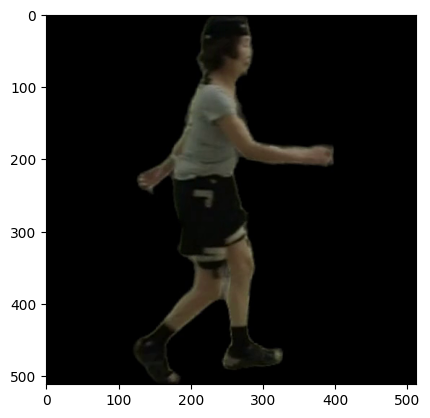

In [2]:
import matplotlib.pyplot as plt

plt.imshow(video[30])

# Why we need segmentation in human gait recognition?

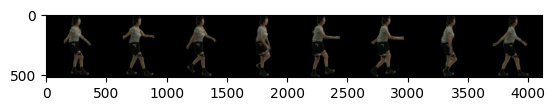

In [37]:
from pytorchvideo.transforms.functional import uniform_temporal_subsample

video_8 = uniform_temporal_subsample(video[10:40], 8, temporal_dim=0)
video_8_row = make_grid(video_8.permute(0, 3, 1, 2), nrow=8)
plt.imshow(video_8_row.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


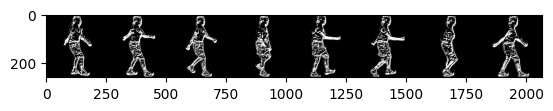

In [4]:
from torch.nn import Conv3d, BatchNorm3d, MaxPool3d

conv3d = Conv3d(in_channels=3, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8 = conv3d(video_8.permute(3,0,1,2).float())

ft_map_8 = make_grid(ft_8.permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


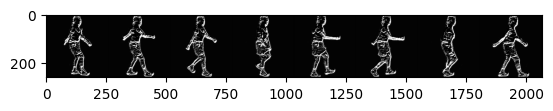

In [5]:
bn3d = BatchNorm3d(num_features=1)

ft_8_bn = bn3d(ft_8.unsqueeze(0))
ft_map_8_bn = make_grid(ft_8_bn.squeeze(0).permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8_bn.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


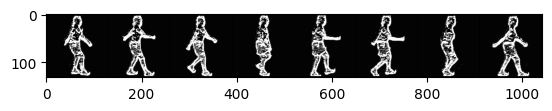

In [6]:
maxpool3d = MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1))

ans = maxpool3d(ft_8_bn.squeeze(dim=0))

ans = make_grid(ans.permute(1,0,2,3), nrow=8)
plt.imshow(ans.permute(1, 2, 0))

# Why we need Optical FLow in human gait recognition?

In [39]:
from torchvision.models.optical_flow import Raft_Large_Weights, raft_large
from torchvision.utils import make_grid, flow_to_image


op_video = video_8.permute(0,3,1,2).float() # make sure f, c, h, w

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

model = raft_large(weights=weights)

current_frame = op_video[:-1, ...] # 0-1 frames 
next_frame = op_video[1:, ...] # 1-last frames

# transforms
current_frame, next_frame = transforms(current_frame, next_frame)

of_8 = model(current_frame, next_frame)[-1]
of_8.shape

torch.Size([7, 2, 512, 512])

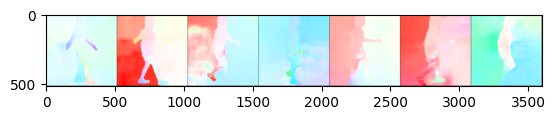

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


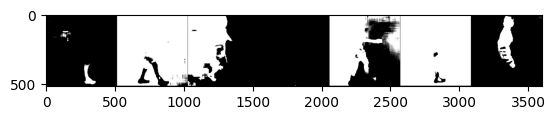

In [41]:
flow_image = flow_to_image(of_8)

ans = make_grid(flow_image, nrow=8)
plt.imshow(ans.permute(1, 2, 0))
plt.show()

ans = make_grid(torch.mean(of_8, dim=1, keepdim=True), nrow=8)
plt.imshow(ans.permute(1, 2, 0).detach().numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


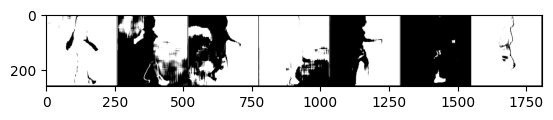

In [9]:
conv3d = Conv3d(in_channels=2, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8_of = conv3d(of_8.permute(1,0,2,3))

ft_map_8_of = make_grid(ft_8_of.permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8_of.permute(1, 2, 0))

In [10]:
ft_8.shape, ft_8_of.shape

(torch.Size([1, 8, 256, 256]), torch.Size([1, 7, 256, 256]))

In [11]:
ans = torch.cat([ft_8[:,:-1,...], ft_8_of], dim= 1)
ans.shape

torch.Size([1, 14, 256, 256])

In [12]:
ans = torch.mul(ft_8[:,:-1,...], ft_8_of)
ans.shape

torch.Size([1, 7, 256, 256])

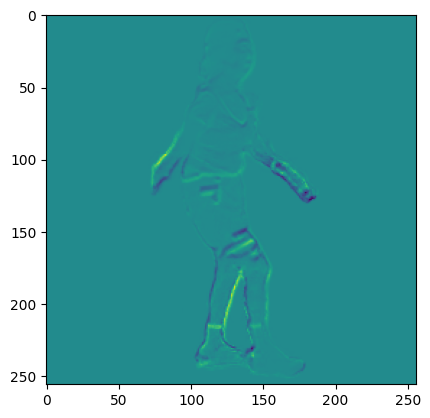

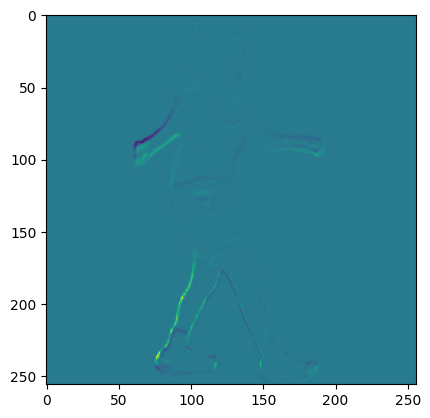

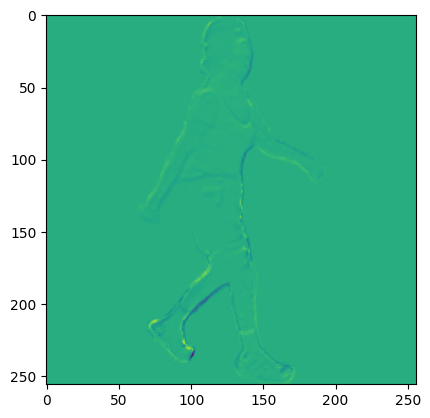

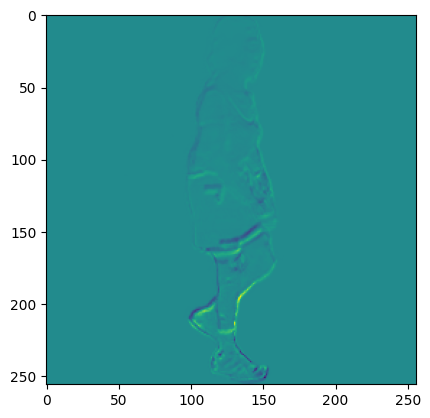

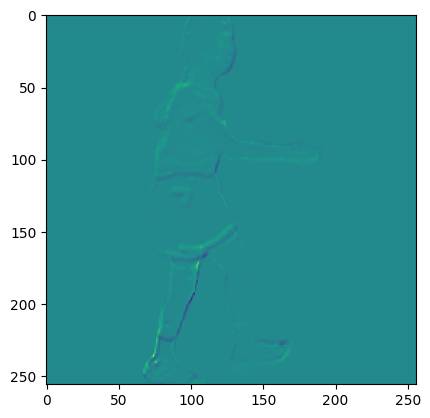

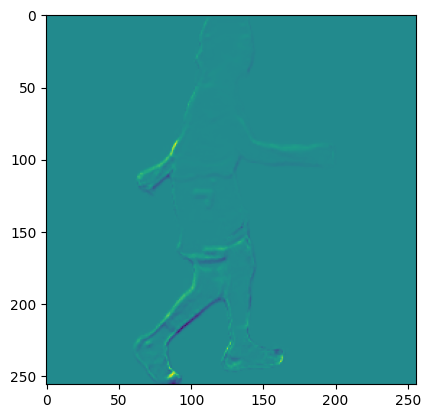

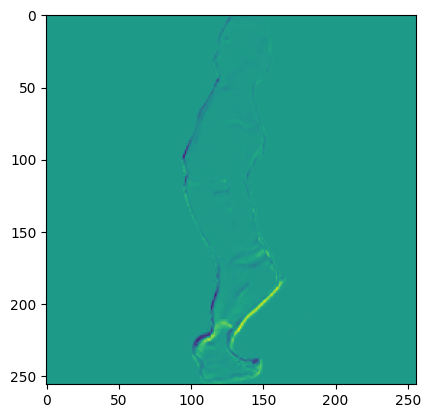

In [13]:
for i in range(7):
    plt.imshow(ans[:,i,...].permute(1, 2, 0).detach().numpy())
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


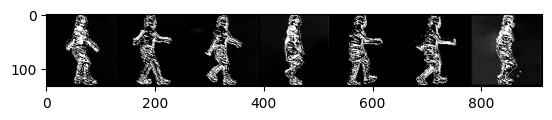

In [14]:
conv3d = Conv3d(in_channels=1, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8_ans = conv3d(ans)

ft_map_8_ans = make_grid(ft_8_ans.permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8_ans.permute(1, 2, 0))

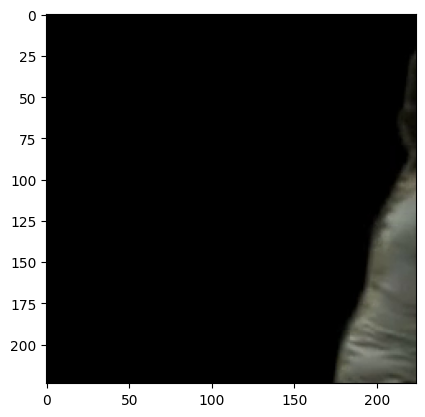

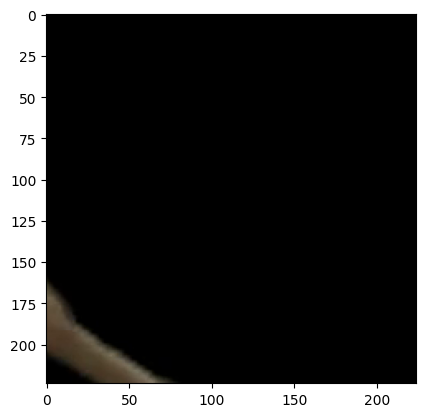

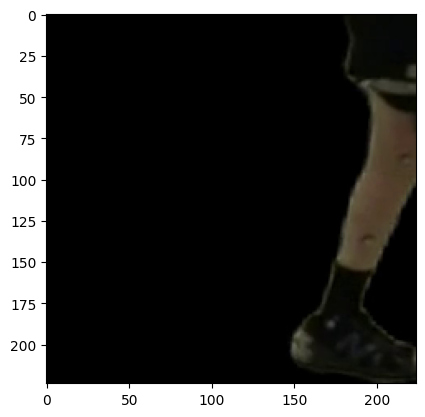

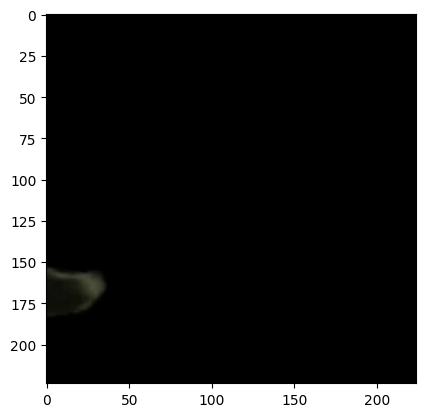

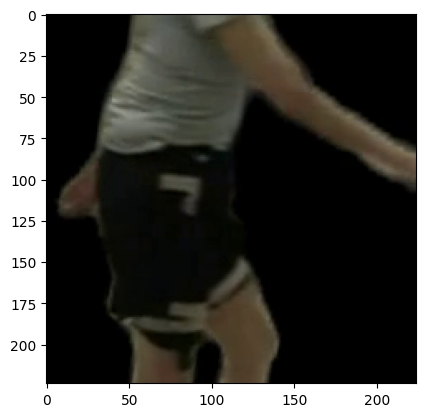

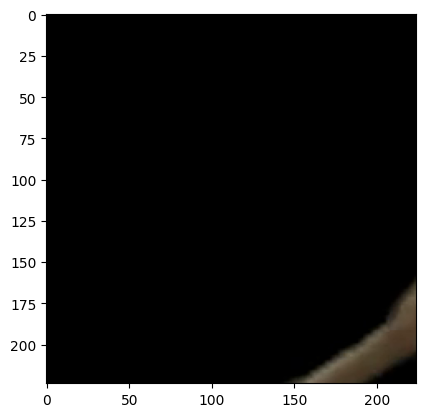

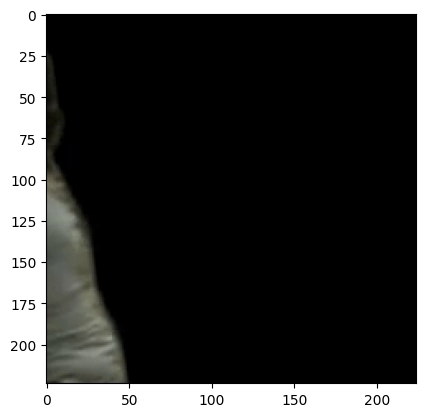

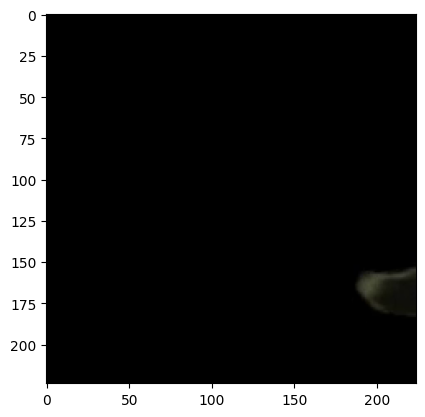

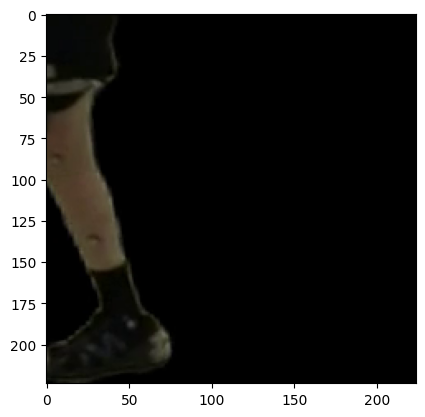

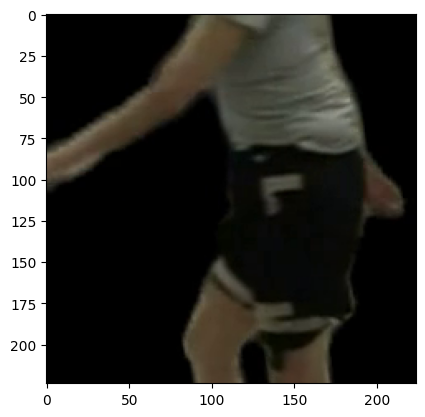

In [15]:
from torchvision.transforms.functional import erase, five_crop, ten_crop

erase_v = video[50].permute(2,0,1)

ans = ten_crop(erase_v, 224)
for a in ans:
    plt.imshow(a.permute(1, 2, 0))
    plt.show()

# What is the different between continuous and uncontinuous frames for optical flow predict?

In [16]:
video_8.shape

torch.Size([8, 512, 512, 3])

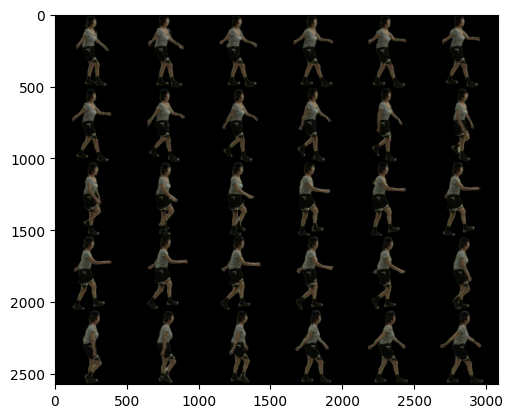

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


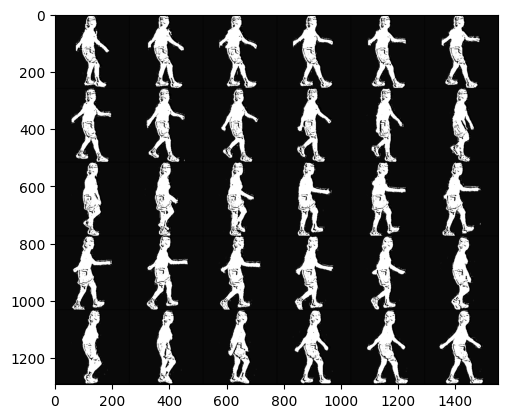

In [33]:
from torch.nn import Conv3d

video_30 = uniform_temporal_subsample(video[10:40], 30, temporal_dim=0)

video_30_row = make_grid(video_30.permute(0, 3, 1, 2), nrow=6)

plt.imshow(video_30_row.permute(1, 2, 0))
plt.show()

# input conv3d
conv3d = Conv3d(in_channels=3, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_30 = conv3d(video_30.permute(3,0,1,2).float())

ft_map_30 = make_grid(ft_30.permute(1,0,2,3), nrow=6)
plt.imshow(ft_map_30.permute(1, 2, 0))

In [26]:
from torchvision.models.optical_flow import Raft_Large_Weights, raft_large
from torchvision.utils import make_grid, flow_to_image


op_video = video_30.permute(0,3,1,2).float() # make sure f, c, h, w

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

model = raft_large(weights=weights)

current_frame = op_video[:-1, ...] # 0-1 frames 
next_frame = op_video[1:, ...] # 1-last frames

# transforms
current_frame, next_frame = transforms(current_frame, next_frame)

of_32 = model(current_frame, next_frame)[-1]
of_32.shape

torch.Size([29, 2, 512, 512])

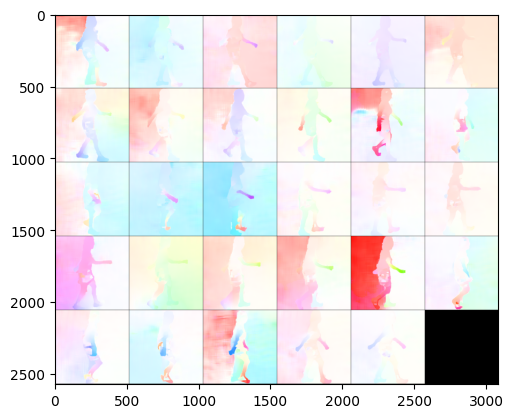

In [34]:
# of_32 = torch.mean(of_32, dim=1, keepdim=True)

of_32_img = flow_to_image(of_32)
ft_map_32 = make_grid(of_32_img, nrow=6)
plt.imshow(ft_map_32.permute(1, 2, 0))

# Does Optical Flow also need clean background?

In [42]:
# not segmentation 
no_seg_video, _, _ = read_video("/workspace/data/test/no_seg.mp4", pts_unit="sec")
# with segmentation
seg_video, _, _ = read_video("/workspace/data/test/seg.mp4", pts_unit="sec")
no_seg_video.shape, seg_video.shape

(torch.Size([84, 512, 512, 3]), torch.Size([74, 512, 512, 3]))

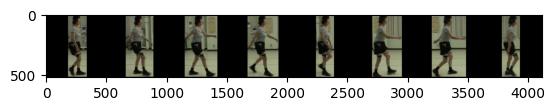

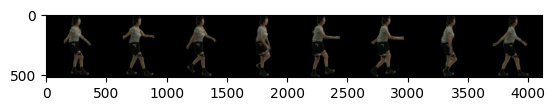

In [47]:
from pytorchvideo.transforms.functional import uniform_temporal_subsample

no_seg_video_8 = uniform_temporal_subsample(no_seg_video[10:40], 8, temporal_dim=0)
seg_video_8 = uniform_temporal_subsample(seg_video[10:40], 8, temporal_dim=0)

no_seg_video_8_row = make_grid(no_seg_video_8.permute(0, 3, 1, 2), nrow=8)

plt.imshow(no_seg_video_8_row.permute(1, 2, 0))
plt.show()

seg_video_8_row = make_grid(seg_video_8.permute(0, 3, 1, 2), nrow=8)

plt.imshow(seg_video_8_row.permute(1, 2, 0))

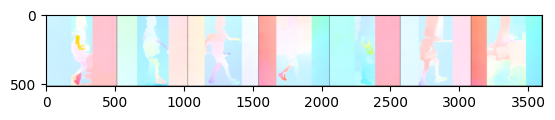

In [51]:
from torchvision.models.optical_flow import Raft_Large_Weights, raft_large
from torchvision.utils import make_grid, flow_to_image


op_video = no_seg_video_8.permute(0,3,1,2).float() # make sure f, c, h, w

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

model = raft_large(weights=weights)

current_frame = op_video[:-1, ...] # 0-1 frames 
next_frame = op_video[1:, ...] # 1-last frames

# transforms
current_frame, next_frame = transforms(current_frame, next_frame)

no_seg_of_8 = model(current_frame, next_frame)[-1]

flow_image = flow_to_image(no_seg_of_8)

ans = make_grid(flow_image, nrow=8)
plt.imshow(ans.permute(1, 2, 0))
plt.show()

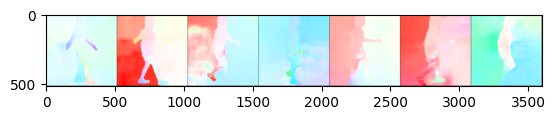

In [52]:

op_video = seg_video_8.permute(0,3,1,2).float() # make sure f, c, h, w

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

model = raft_large(weights=weights)

current_frame = op_video[:-1, ...] # 0-1 frames 
next_frame = op_video[1:, ...] # 1-last frames

# transforms
current_frame, next_frame = transforms(current_frame, next_frame)

no_seg_of_8 = model(current_frame, next_frame)[-1]

flow_image = flow_to_image(no_seg_of_8)
ans = make_grid(flow_image, nrow=8)
plt.imshow(ans.permute(1, 2, 0))

# How to fuse the different features?

In [53]:
video_8.shape, of_8.shape

(torch.Size([8, 512, 512, 3]), torch.Size([7, 2, 512, 512]))

In [57]:
video_8.dtype, of_8.dtype

(torch.uint8, torch.float32)

In [62]:
video_8_float = video_8.float() / 255
video_8_float = video_8_float.permute(0,3,1,2)
video_8_float.max(), video_8_float.min()


(tensor(0.6392), tensor(0.))

In [63]:
video_8_float.shape, of_8.shape

(torch.Size([8, 3, 512, 512]), torch.Size([7, 2, 512, 512]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


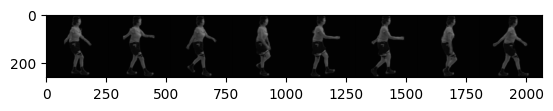

In [77]:
from torch.nn import Conv3d

conv3d = Conv3d(in_channels=3, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8 = conv3d(video_8_float.permute(1,0,2,3).float())

ft_map_8 = make_grid(ft_8.permute(1,0,2,3)[:,:8,...], nrow=8)
plt.imshow(ft_map_8.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


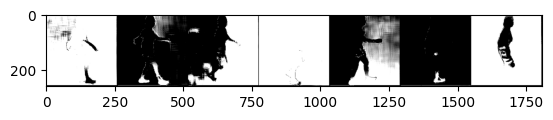

In [78]:
from torch.nn import Conv3d

conv3d = Conv3d(in_channels=2, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

of_ft_8 = conv3d(of_8.permute(1,0,2,3).float())

of_ft_map_8 = make_grid(of_ft_8.permute(1,0,2,3)[:,:8,...], nrow=8)
plt.imshow(of_ft_map_8.permute(1, 2, 0))

In [88]:
ans = (of_ft_8 + ft_8[:,:-1,...]) / 2
ans.shape, ans.max(), ans.min()

(torch.Size([1, 7, 256, 256]),
 tensor(13.0511, grad_fn=<MaxBackward1>),
 tensor(-16.9466, grad_fn=<MinBackward1>))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


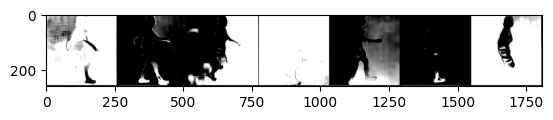

In [89]:
ans_ft = make_grid(ans.permute(1,0,2,3), nrow=8)
plt.imshow(ans_ft.permute(1, 2, 0))

In [90]:
ans = of_ft_8 * ft_8[:,:-1,...]
ans.shape, ans.max(), ans.min()

(torch.Size([1, 7, 256, 256]),
 tensor(4.6406, grad_fn=<MaxBackward1>),
 tensor(-5.2126, grad_fn=<MinBackward1>))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


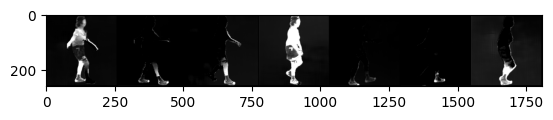

In [91]:
ans_ft = make_grid(ans.permute(1,0,2,3), nrow=8)
plt.imshow(ans_ft.permute(1, 2, 0))

In [93]:
ans = torch.cat([ft_8[:,:-1,...], of_ft_8], dim=0)
ans.shape, ans.max(), ans.min()

(torch.Size([2, 7, 256, 256]),
 tensor(26.0755, grad_fn=<MaxBackward1>),
 tensor(-33.9036, grad_fn=<MinBackward1>))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


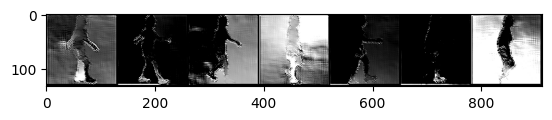

In [95]:
from torch.nn import Conv3d

conv3d = Conv3d(in_channels=2, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ans_cat = conv3d(ans)

ans_cat_ft_map_8 = make_grid(ans_cat.permute(1,0,2,3)[:,:8,...], nrow=8)
plt.imshow(ans_cat_ft_map_8.permute(1, 2, 0))

# Visualization of the different dimension of optical flow

In [126]:
of_8.shape

torch.Size([7, 2, 512, 512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


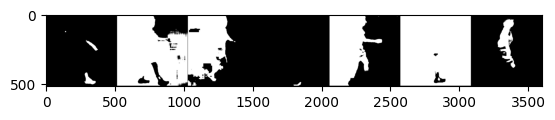

In [122]:
ans = make_grid(of_8[:,0,...].unsqueeze(dim=0).permute(1,0,2,3), nrow=8)
plt.imshow(ans.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


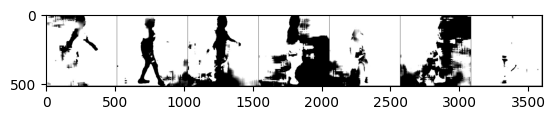

In [127]:
ans = make_grid(of_8[:,1,...].unsqueeze(dim=0).permute(1,0,2,3), nrow=8)
plt.imshow(ans.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


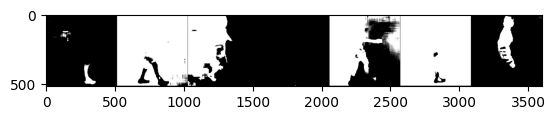

In [128]:
ans = torch.mean(of_8, dim=1, keepdim=True)
ans = make_grid(ans, nrow=8)
plt.imshow(ans.permute(1, 2, 0))

In [120]:
ans.shape

torch.Size([3, 516, 3600])